In [1]:
import numpy as np
import matplotlib.pyplot as plt

from NeuralNet import Linear, MeanSquaredError

In [2]:
# Generate dummy data
np.random.seed(42)

# Luas rumah (m^2), antara 50 hingga 300 meter persegi
luas_rumah = np.round(np.random.uniform(50, 300, 100).reshape(-1, 1), 2)

# Harga rumah (dalam juta rupiah), dengan variasi acak
harga_rumah = np.round((luas_rumah * 5 + np.random.normal(0, 50, luas_rumah.shape)).reshape(-1, 1), 2)

In [3]:
X = luas_rumah
Y = harga_rumah

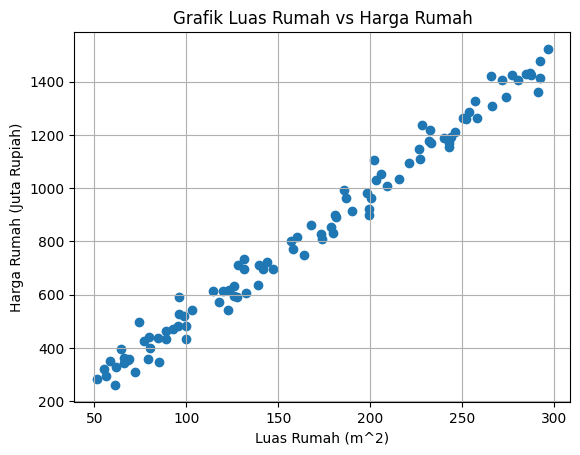

In [4]:
plt.scatter(X, Y)
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title('Grafik Luas Rumah vs Harga Rumah')
plt.show()

In [5]:
np.random.seed(42)

# Inisialisasi layer-layer
# Layer 1: 3 input -> 2 output
input_to_hidden_layer = Linear(in_features=1, out_features=2)  
# Layer 2: 2 input -> 3 output
hidden_to_hidden_layer = Linear(in_features=2, out_features=3)
# Layer 3: 3 input -> 1 output  
hidden_to_output_layer = Linear(in_features=3, out_features=1)

# Inisialisasi Mean Squared Error sebagai loss function
loss = MeanSquaredError()
lowest_loss = np.inf  # some initial value 

best_HL_1_weights, best_HL_1_biases = input_to_hidden_layer.weight.copy(), input_to_hidden_layer.bias.copy()
best_HL_2_weights, best_HL_2_biases = hidden_to_hidden_layer.weight.copy(), hidden_to_hidden_layer.bias.copy()
best_output_layer_weights, best_output_layer_biases = hidden_to_output_layer.weight.copy(), hidden_to_output_layer.bias.copy()

print(f'best_HL_1_weights: {best_HL_1_weights.shape} \n {best_HL_1_weights}')
print(f'best_HL_1_biases: {best_HL_1_biases.shape} \n {best_HL_1_biases}')
print()
print(f'best_HL_2_weights: {best_HL_2_weights.shape} \n {best_HL_2_weights}')
print(f'best_HL_2_biases: {best_HL_2_biases.shape} \n {best_HL_2_biases}')
print()
print(f'best_output_layer_weights: {best_output_layer_weights.shape} \n {best_output_layer_weights}')
print(f'best_output_layer_biases: {best_output_layer_biases.shape} \n {best_output_layer_biases}')

best_HL_1_weights: (1, 2) 
 [[ 0.00496714 -0.00138264]]
best_HL_1_biases: (1, 2) 
 [[0. 0.]]

best_HL_2_weights: (2, 3) 
 [[ 0.00647689  0.0152303  -0.00234153]
 [-0.00234137  0.01579213  0.00767435]]
best_HL_2_biases: (1, 3) 
 [[0. 0. 0.]]

best_output_layer_weights: (3, 1) 
 [[-0.00469474]
 [ 0.0054256 ]
 [-0.00463418]]
best_output_layer_biases: (1, 1) 
 [[0.]]


Text(0.5, 0, 'Luas Rumah (m^2)')

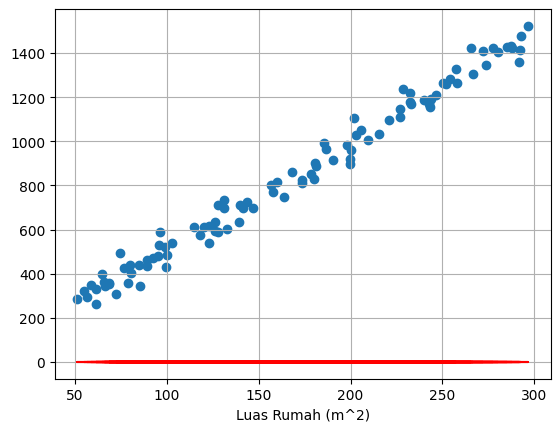

In [6]:
y_pred = hidden_to_output_layer.forward(hidden_to_hidden_layer.forward(input_to_hidden_layer.forward(X)))
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')

In [7]:
for i in range(5000):
	# update weights and biases di hidden layer 1
	input_to_hidden_layer.weight -= np.random.normal(0, 0.1, input_to_hidden_layer.weight.shape)
	input_to_hidden_layer.bias -= np.random.normal(0, 0.1, input_to_hidden_layer.bias.shape)
	
	# update weights and biases di hidden layer 2
	hidden_to_hidden_layer.weight -= np.random.normal(0, 0.1, hidden_to_hidden_layer.weight.shape)
	hidden_to_hidden_layer.bias -= np.random.normal(0, 0.1, hidden_to_hidden_layer.bias.shape)
	
	# update weights and biases di output layer
	hidden_to_output_layer.weight -= np.random.normal(0, 0.1, hidden_to_output_layer.weight.shape)
	hidden_to_output_layer.bias -= np.random.normal(0, 0.1, hidden_to_output_layer.bias.shape)

	# Forward pass melalui jaringan
	Z_1 = input_to_hidden_layer.forward(X)  # Output dari layer 1
	Z_2 = hidden_to_hidden_layer.forward(Z_1)  # Output dari layer 2
	Y_pred = hidden_to_output_layer.forward(Z_2)  # Output akhir

	# Hitung rata-rata dari kuadrat selisih
	mse_loss = loss.calculate(Y, Y_pred)

	if mse_loss < lowest_loss:
		print(f"nilai parameter terbaik ditemukan pada iterasi ke-{i}, dengan loss: {mse_loss}")
		best_HL_1_weights, best_HL_1_biases = input_to_hidden_layer.weight.copy(), input_to_hidden_layer.bias.copy()
		best_HL_2_weights, best_HL_2_biases = hidden_to_hidden_layer.weight.copy(), hidden_to_hidden_layer.bias.copy()
		best_output_layer_weights, best_output_layer_biases = hidden_to_output_layer.weight.copy(), hidden_to_output_layer.bias.copy()
		lowest_loss = mse_loss
	else:
		input_to_hidden_layer.weight, input_to_hidden_layer.bias = best_HL_1_weights.copy(), best_HL_1_biases.copy()
		hidden_to_hidden_layer.weight, hidden_to_hidden_layer.bias = best_HL_2_weights.copy(), best_HL_2_biases.copy()
		hidden_to_output_layer.weight, hidden_to_output_layer.bias = best_output_layer_weights.copy(), best_output_layer_biases.copy()

nilai parameter terbaik ditemukan pada iterasi ke-0, dengan loss: 835578.3845508355
nilai parameter terbaik ditemukan pada iterasi ke-4, dengan loss: 833612.8079977063
nilai parameter terbaik ditemukan pada iterasi ke-5, dengan loss: 828853.3614312218
nilai parameter terbaik ditemukan pada iterasi ke-7, dengan loss: 827574.1080969672
nilai parameter terbaik ditemukan pada iterasi ke-8, dengan loss: 823210.7530289693
nilai parameter terbaik ditemukan pada iterasi ke-12, dengan loss: 822330.2405453874
nilai parameter terbaik ditemukan pada iterasi ke-13, dengan loss: 809603.466146696
nilai parameter terbaik ditemukan pada iterasi ke-14, dengan loss: 798826.8587466127
nilai parameter terbaik ditemukan pada iterasi ke-18, dengan loss: 793880.7777594381
nilai parameter terbaik ditemukan pada iterasi ke-22, dengan loss: 791772.1487394762
nilai parameter terbaik ditemukan pada iterasi ke-23, dengan loss: 785140.9311748709
nilai parameter terbaik ditemukan pada iterasi ke-28, dengan loss: 7847

Text(0.5, 0, 'Luas Rumah (m^2)')

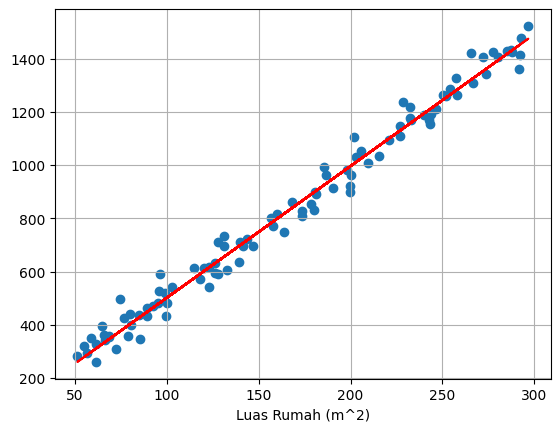

In [8]:
y_pred = hidden_to_output_layer.forward(hidden_to_hidden_layer.forward(input_to_hidden_layer.forward(X)))
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')